<h1> TUTORIAL TWO: </h1>
<h1> RUNNING MORE COMPLICATED THINGS </h1>
<h3> Author: Lindsey Gordon. Last Update: 11-17-22 </h3>

How to run this with GP background modelling

Actually we're just re-using the tutorial_1_data files

In [1]:
#load in modules
import numpy as np
from etsfit import etsMAIN
import etsfit.utils.utilities as ut
import pandas as pd
from astropy.time import Time

In [2]:
# THINGS YOU SAW IN TUTORIAL 1
#TNS info:
TNSFile = "./tutorial_1_data/2018hzh_TNS.csv"
TNSinfo = pd.read_csv(TNSFile)
#data file:
dataFile = "./tutorial_1_data/2018hzh0431-tessreduce"

#saving into our local folder
folderSave = "."

#load data:
(time, intensity, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
#get the discovery time from the TNSFile
d = TNSinfo[TNSinfo["Name"].str.contains(targetlabel)]["Discovery Date (UT)"]
discoverytime = Time(d.iloc[0], format = 'iso', scale='utc').jd

#make an etsfit instance
ets = etsMAIN(folderSave, TNSFile)
             
#load the data in                           
ets.load_single_lc(time, intensity, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filterMade = ets.window_rms_filt(plot=False)

2018hzh 04 3 1


The next cell demos how to run one of the GP fits. Currently only a single power law is supported as the base model. 

There are four GP options: 'celerite' (celerite matern 3/2), 'expsqr' (tinygp), expsinsqr (tinygp), and 'matern32' (tinygp)

In [3]:
# NEW THINGS YOU HAVE NOT SEEN YET:
gpUSE = "celerite"
ets.run_GP_fit(filterMade, n1=10000, n2=25000, gpUSE=gpUSE)

saving into folder:  ./2018hzh0431/celerite-matern32-None/
Initial log-likelihood: -9020.230729033028
 *** 
 *** 
 *** 
 ***
Beginning MCMC run
Starting burnin chain


100%|█████████████████████████████████████| 25000/25000 [08:47<00:00, 47.41it/s]


125000 samples post second run
t0 10.010991567615406 -0.04747393225122387 0.045799984555642936
A 3.513803289896738 -0.04975682709736695 0.04967634649788044
beta 0.6864774267832656 -0.004609391321474754 0.006425881409625744
b -20.34023023237578 -0.02031303220867997 0.021216273365407545
$log\sigma$ 1.4968496638068987 -0.002101911538368917 0.0009518119725540064
$log\rho$ 0.0010228135307429522 -0.0007831458672963311 0.0029465010217877953
log prob: [-17972.67806828]
BAYESIAN INF CRIT:  [-35903.7497533]


If you want to run a tinygp vs celerite matern-3/2 comparison run, try the next cell: 

2018hzh 04 3 1
saving into folder:  ./2018hzh0431/celerite-tinygp-matern32/
Using bounds
Initial celerite log-likelihood: -9020.230729033028
*** 
 *** 
 *** 
 ***
Beginning MCMC + GP run
Starting burn-in chain


100%|█████████████████████████████████████| 10000/10000 [02:55<00:00, 56.96it/s]


[[ 1.00041637e+01  3.50565358e+00  6.85864191e-01 -2.03435035e+01
   1.49658513e+00  8.34745138e-04]]
Initial negative log likelihood: 3651.644530352238
Final negative log likelihood: 3414.9596738301534


100%|█████████████████████████████████████| 20000/20000 [06:31<00:00, 51.10it/s]


300000 samples post second run
t0 10.009925158431653 -0.04674190347888896 0.04678280734354345
A 3.513789648082266 -0.04922503472400974 0.048887076421636255
beta 0.6865651384371652 -0.004578476311235424 0.006350629902501237
b -20.34058273837531 -0.020370472132889006 0.02131671009571079
$log\sigma$ 1.4968476902648755 -0.0021223906384819635 0.0009517332958641767
$log\rho$ 0.0010006385734646 -0.0007635135850347346 0.002958794201316888
neg. log prob for celerite:  [17974.13315738]
BIC (celerite)  [-35906.6599315]
BIC (tinygp):  [-27613.1697113]


AttributeError: 'numpy.ndarray' object has no attribute 'tick_params'

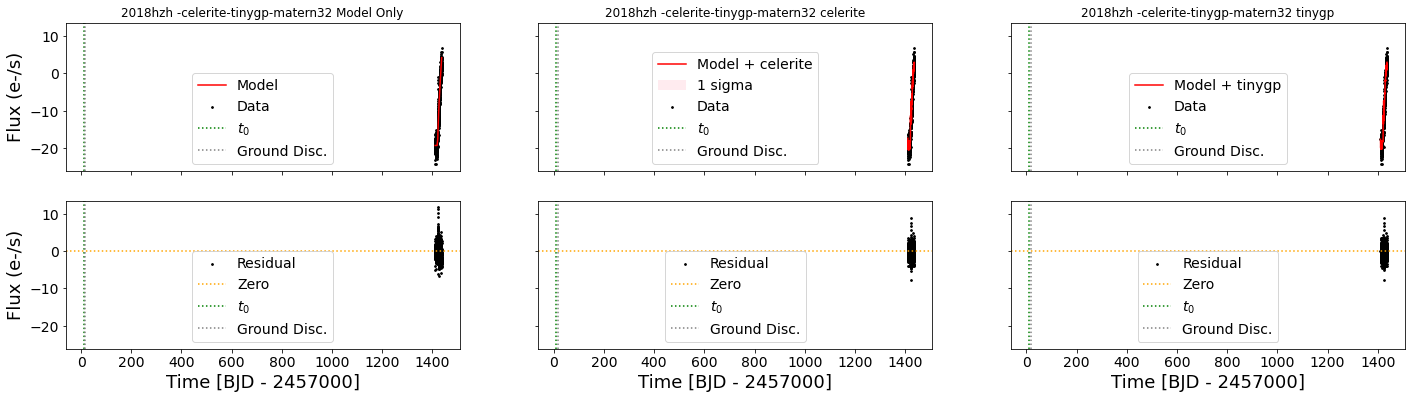

In [6]:
#load data:
(time, intensity, error, targetlabel, 
                 sector, camera, ccd) = ut.tr_load_lc(dataFile)
#get the discovery time from the TNSFile
d = TNSinfo[TNSinfo["Name"].str.contains(targetlabel)]["Discovery Date (UT)"]
discoverytime = Time(d.iloc[0], format = 'iso', scale='utc').jd

#make an etsfit instance
ets = etsMAIN(folderSave, TNSFile)
             
#load the data in                           
ets.load_single_lc(time, intensity, error, discoverytime, 
                   targetlabel, sector, camera, ccd)
filterMade = ets.window_rms_filt(plot=False)
ets.run_both_matern32(filterMade)